In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Create an image data generator with augmentsations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=None,
    fill_mode='reflect'
)

# Load image from path
img = load_img(r"/content/drive/MyDrive/Data Augumentation /cat.jpg")

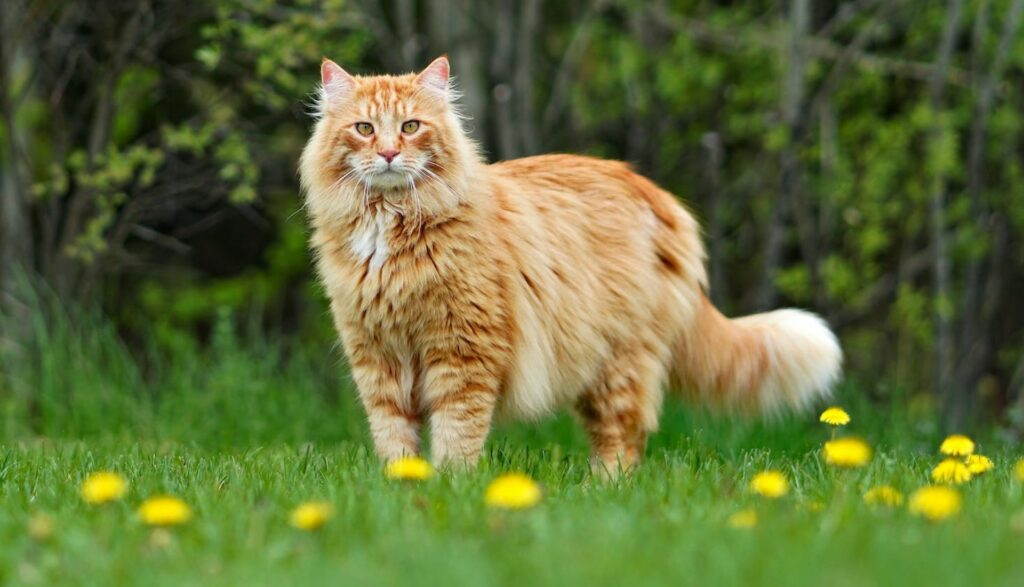

In [ ]:
img

In [ ]:
# Convert to numpy array
x = img_to_array(img)
x = x.reshape((1,) + x.shape)   # Reshape to (1, height, width, channels)

# Generate augmented images and save
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='/content/drive/MyDrive/Data Augumentation /data augmentation model images/reflect mode', save_prefix='cat', save_format='jpeg'):
  i += 1
  if i > 30:
    break       # Prevent infinite loop

# Gradio ui

# Task
Create a Gradio frontend for the provided Python code that performs image augmentation using TensorFlow's ImageDataGenerator. The interface should allow users to upload an image and display the augmented versions of the image.

## Install gradio

### Subtask:
Install the Gradio library in the Colab environment.


**Reasoning**:
The subtask is to install the Gradio library. I will use pip to install it.



In [ ]:
%pip install gradio

## Import libraries

### Subtask:
Import necessary libraries including `tensorflow`, `ImageDataGenerator`, `load_img`, `img_to_array`, and `gradio`.


**Reasoning**:
Import the required libraries for image processing and Gradio.



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import gradio as gr

## Define augmentation function

### Subtask:
Create a Python function that takes an image as input, performs the image augmentation using the defined `ImageDataGenerator`, and returns a list of augmented images.


**Reasoning**:
Define a Python function that takes an image as input, converts it to a NumPy array, reshapes it, uses the existing `datagen` object to generate augmented images, collects them into a list, and returns the list.



In [ ]:
def augment_image(image, num_augmentations=5):
  """
  Augments an input image using the predefined ImageDataGenerator.

  Args:
    image: A PIL Image object.
    num_augmentations: The number of augmented images to generate.

  Returns:
    A list of PIL Image objects representing the augmented images.
  """
  # Convert to numpy array
  x = img_to_array(image)
  x = x.reshape((1,) + x.shape)   # Reshape to (1, height, width, channels)

  augmented_images = []
  i = 0
  for batch in datagen.flow(x, batch_size=1):
    augmented_image_array = batch[0].astype('uint8') # Convert back to uint8
    augmented_image = tf.keras.utils.array_to_img(augmented_image_array) # Convert numpy array to PIL Image
    augmented_images.append(augmented_image)
    i += 1
    if i >= num_augmentations:
      break       # Prevent infinite loop

  return augmented_images

## Create gradio interface

### Subtask:
Use `gradio.Interface` to create a web interface for the augmentation function. Set the input to an image component and the output to gallery or multiple image components to display the augmented images.


**Reasoning**:
Create a Gradio interface using `gr.Interface` with the defined `augment_image` function as the callable, an image input component, and a gallery output component.



In [ ]:
iface = gr.Interface(
    fn=augment_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Gallery(),
    title="Image Augmentation with TensorFlow"
)

**Reasoning**:
Launch the Gradio interface to allow users to interact with the image augmentation functionality.



In [ ]:
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b3feac84c9ccef2d9d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Launch interface

### Subtask:
Launch the Gradio interface.


**Reasoning**:
Launch the Gradio interface object `iface`.



In [ ]:
iface.launch()

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b3feac84c9ccef2d9d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Summary:

### Data Analysis Key Findings

*   The Gradio library was already installed in the environment.
*   All necessary libraries for the image augmentation application were successfully imported.
*   A Python function `augment_image` was successfully defined to perform image augmentation using `ImageDataGenerator` and return a list of augmented images.
*   A Gradio interface was successfully created with an image input and a gallery output, linked to the `augment_image` function.
*   The Gradio interface was successfully launched and made accessible via a public URL.

### Insights or Next Steps

*   The Gradio interface provides a user-friendly way to interact with the image augmentation process.
*   For permanent hosting, the application could be deployed to a platform like Hugging Face Spaces.


# Gradio ui best version

In [3]:
# Install gradio if not already
!pip install gradio --quiet

import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img

# Function for augmentation
def augment_image(
    image,
    rotation=40,
    width_shift=0.2,
    height_shift=0.2,
    shear=0.2,
    zoom=0.2,
    horizontal_flip=True,
    fill_mode="reflect",
    num_samples=5
):
    if image is None:
        return []

    # Convert PIL image to numpy
    x = img_to_array(image)
    x = x.reshape((1,) + x.shape)

    datagen = ImageDataGenerator(
        rotation_range=rotation,
        width_shift_range=width_shift,
        height_shift_range=height_shift,
        shear_range=shear,
        zoom_range=zoom,
        horizontal_flip=horizontal_flip,
        fill_mode=fill_mode
    )

    # Generate augmented images
    images = []
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        img = array_to_img(batch[0], scale=True)
        images.append(img)
        i += 1
        if i >= num_samples:
            break
    return images

# Build Gradio UI
with gr.Blocks(css=".gradio-container {background-color: #f9fafb;}") as demo:
    gr.Markdown("<h1 style='text-align: center; color:#4A90E2;'>✨ Image Data Augmentation Playground ✨</h1>")
    gr.Markdown("Upload an image and play around with augmentation parameters. Preview augmented images instantly!")

    with gr.Row():
        with gr.Column(scale=1):
            input_image = gr.Image(type="pil", label="Upload Image")
            rotation = gr.Slider(0, 90, value=40, step=1, label="Rotation Range")
            width_shift = gr.Slider(0, 0.5, value=0.2, step=0.05, label="Width Shift Range")
            height_shift = gr.Slider(0, 0.5, value=0.2, step=0.05, label="Height Shift Range")
            shear = gr.Slider(0, 0.5, value=0.2, step=0.05, label="Shear Range")
            zoom = gr.Slider(0, 0.5, value=0.2, step=0.05, label="Zoom Range")
            horizontal_flip = gr.Checkbox(value=True, label="Enable Horizontal Flip")
            fill_mode = gr.Dropdown(["nearest", "reflect", "wrap", "constant"], value="reflect", label="Fill Mode")
            num_samples = gr.Slider(1, 10, value=5, step=1, label="Number of Augmented Images")

            augment_button = gr.Button("🚀 Augment Image")

        with gr.Column(scale=2):
            output_gallery = gr.Gallery(label="Augmented Images", columns=3, height="auto")

    augment_button.click(
        augment_image,
        inputs=[input_image, rotation, width_shift, height_shift, shear, zoom, horizontal_flip, fill_mode, num_samples],
        outputs=output_gallery
    )

# Launch the app
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://91e14c262bc3746990.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
